Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
1       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
1       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
1         0         0         0         0  

[1 rows x 784 columns]


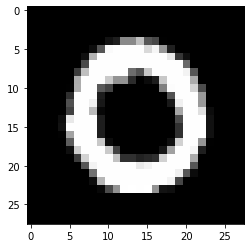

In [ ]:
# 구글 코랩 <-> 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# 데이터 불러오기
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SAI 문제풀이/number.csv')

# 2번째 data의 그림 그려보기
import matplotlib.pyplot as plt
print(data[1:2])
pic1 = (data[1:2].to_numpy()).reshape(28,28)
plt.imshow(pic1, cmap='gray')
plt.show()

In [ ]:
import numpy as np
# 데이터 numpy로 정리
data = (data[0:42000])
print(data.shape)

# 각 클러스터의 그림을 출력하는 함수
def draw_fruits(arr, ratio=1):
  n = len(arr)   ### 샘플 개수
  rows = int(np.ceil(n/10))   ### 한 줄에 10개씩 이미지 그리기
  cols = n if rows < 2 else 10   ### 행이 1개면 열의 개수는 샘플 개수 -> 그렇지 않으면 10개
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n :
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

# PCA 실행
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(data)

# 주성분 그림 그리기
draw_fruits(pca.components_.reshape(-1,28,28))

# 원본 데이터의 차원 100개로 줄이기
print(data.shape)
data_pca = pca.transform(data)
print(data_pca.shape)

(3990, 100)


ValueError: ignored

In [ ]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾아보기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=42)
km.fit(data_pca)
print(np.unique(km.labels_, return_counts=True))

# 클러스터별 이미지 출력
for label in range(0,10):
  datascatter = data_pca[km.labels_ == label]
  plt.scatter(data[:,0],data[:,1])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([3235, 5280, 3904, 2212, 4657, 5985, 4113, 2190, 6434, 3990]))


TypeError: ignored

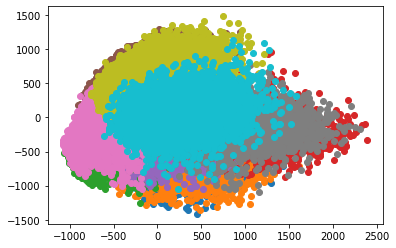

In [ ]:
# 클러스터별 산점도
for label in range(0,10):
  data = data_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.show()